In [103]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, date, timedelta
from matplotlib.dates import DateFormatter 
from pandas.api.types import CategoricalDtype
pd.options.display.max_columns = 200
pd.options.display.max_rows = 100


In [269]:
columns = pd.read_csv('genes_matrix_csv/columns_metadata.csv', index_col='column_num')
rows = pd.read_csv('genes_matrix_csv/rows_metadata.csv')
expression = pd.read_csv('genes_matrix_csv/expression_matrix.csv', header=None).set_index(0)

In [270]:
age_cats = CategoricalDtype(['8 pcw', '9 pcw', '12 pcw', '13 pcw', '16 pcw', '17 pcw', '19 pcw',
       '21 pcw', '24 pcw', '25 pcw', '26 pcw', '35 pcw', '37 pcw',
       '4 mos', '10 mos', '1 yrs', '2 yrs', '3 yrs', '4 yrs', '8 yrs',
       '11 yrs', '13 yrs', '15 yrs', '18 yrs', '19 yrs', '21 yrs',
       '23 yrs', '30 yrs', '36 yrs', '37 yrs', '40 yrs'], ordered=True)
columns.age = columns.age.astype(age_cats)

In [221]:
rows[rows.gene_symbol.isin(['ITPR1','ITPR2','ITPR3','SPTBN2','ACTB','RORA'])]

,row_num,gene_id,ensembl_gene_id,gene_symbol,entrez_id
1090,1091,6063.0,ENSG00000069667,RORA,6095.0
1329,1330,57.0,ENSG00000075624,ACTB,60.0
2081,2082,3685.0,ENSG00000096433,ITPR3,3710.0
5390,5391,3684.0,ENSG00000123104,ITPR2,3709.0
9444,9445,3683.0,ENSG00000150995,ITPR1,3708.0
13778,13779,6672.0,ENSG00000173898,SPTBN2,6712.0


In [293]:
def plot_gene(gene):
    gene_exp = expression.loc[rows.loc[rows.gene_symbol == gene,'row_num'].values] #9445 is ITPR1
    columns[gene] = gene_exp.T
    #a = columns[columns.structure_acronym == 'CBC'].sort_values(by='age')
    a = columns.sort_values(by='age')

    plt.figure(figsize=(22,10))
    ax = sns.lineplot(data=a, x='age', y=gene, hue='structure_name', linewidth=2)
    ax.legend(loc='center right', bbox_to_anchor=(1.3,0.5))
    ax.set_title(f'{gene} Expression During Development')
    plt.ylabel('RPKM')
    plt.show()

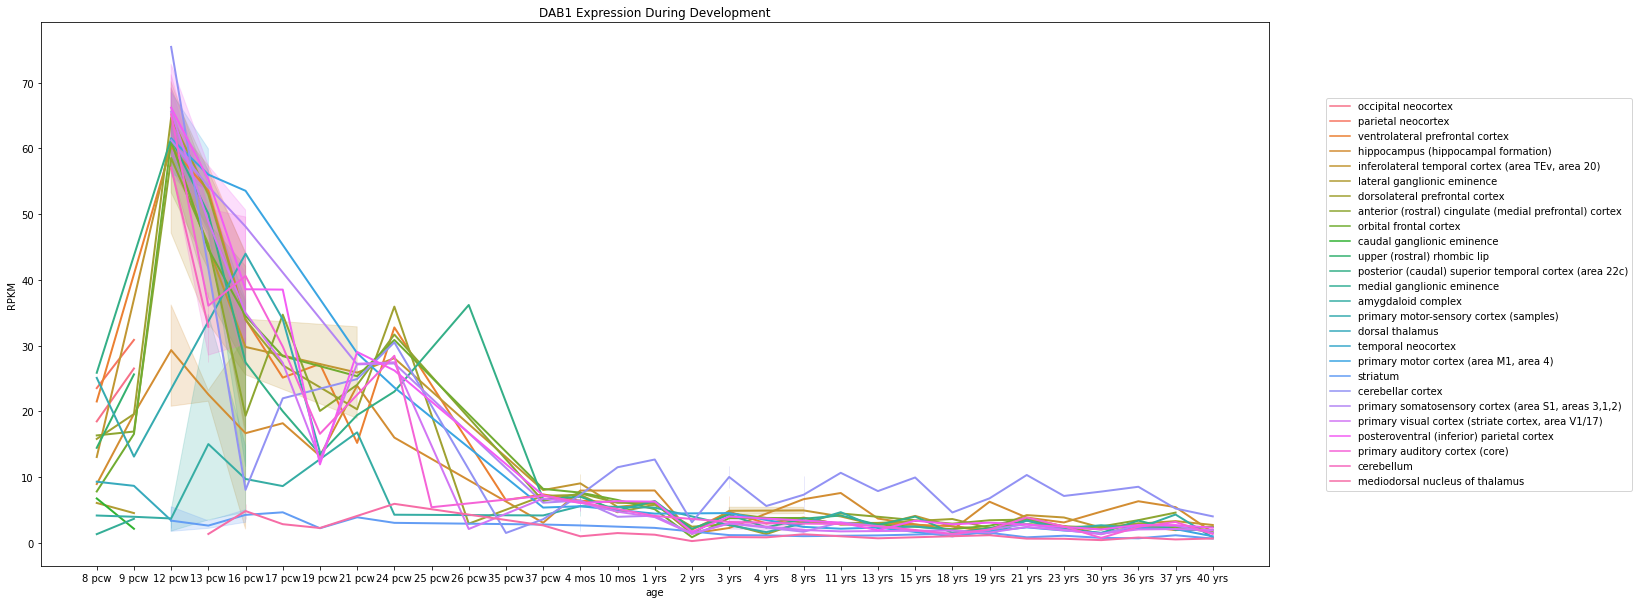

In [307]:
plot_gene('DAB1')

In [273]:
columns

,donor_id,donor_name,age,gender,structure_id,structure_acronym,structure_name,ITPR1
column_num,,,,,,,,
1,13058,H376.IIA.51,8 pcw,M,10268,Ocx,occipital neocortex,0.235804
2,13058,H376.IIA.51,8 pcw,M,10291,M1C-S1C,primary motor-sensory cortex (samples),0.279734
3,13058,H376.IIA.51,8 pcw,M,10361,AMY,amygdaloid complex,0.321089
4,13058,H376.IIA.51,8 pcw,M,10550,MGE,medial ganglionic eminence,0.195760
5,13058,H376.IIA.51,8 pcw,M,10243,STC,posterior (caudal) superior temporal cortex (a...,0.411831
...,...,...,...,...,...,...,...,...
520,12304,H376.XI.56,40 yrs,F,10225,IPC,posteroventral (inferior) parietal cortex,40.370503
521,12304,H376.XI.56,40 yrs,F,10163,M1C,"primary motor cortex (area M1, area 4)",8.912865
522,12304,H376.XI.56,40 yrs,F,10294,HIP,hippocampus (hippocampal formation),7.280872
